# 3 classifiers and metrics {-}

In [334]:
import pandas as pd
import numpy as np
import math
from gosdt import GOSDT
import matplotlib.pyplot as plt

### 3.1) {-}

In [335]:
dict3 = {'Age':[20,18,11,31,19,21,44,15,16,17], 
    'LikeRowing':[1,1,0,0,1,1,1,1,0,1], 
    'Experience':[0,1,1,0,1,0,0,1,1,0], 
    'Income':[20,33,21,18,7,10,23,16,15,6], 
    'Y':[0,0,1,1,1,0,1,0,1,0]}
df = pd.DataFrame(dict3)
data_matrix = df.to_numpy()
print(data_matrix) 
# create data table

[[20  1  0 20  0]
 [18  1  1 33  0]
 [11  0  1 21  1]
 [31  0  0 18  1]
 [19  1  1  7  1]
 [21  1  0 10  0]
 [44  1  0 23  1]
 [15  1  1 16  0]
 [16  0  1 15  1]
 [17  1  0  6  0]]


In [336]:
# computation functions
def boundry_confusion_matrix(ys_sort, i):
    # arguments are sorted matrix of y's and function outputs, and index of threshold
    tp = np.count_nonzero(ys_sort[:i, 1] == 1) # true positive
    fp = np.count_nonzero(ys_sort[:i, 1] == 0) # false positive
    fn = np.count_nonzero(ys_sort[i:, 1] == 1) # false negative
    tn = np.count_nonzero(ys_sort[i:, 1] == 0) # true negative
    conf_mat = np.array([[tp, fn], [fp, tn]]).T # confusion matrix
    return conf_mat

def misclassification_error(conf_mat, n):
    # arguments are confusion matrix and number of observations
    mc_error = (conf_mat[1,0] + conf_mat[0,1])/n
    return mc_error

def metrics(conf_mat):
    # arguemnts are confusion matrix
    if (conf_mat[0, 0] + conf_mat[0, 1]) == 0:
        precision = 0
    else:
        precision = conf_mat[0,0]/(conf_mat[0, 0] + conf_mat[0, 1]) # calc precision
    if (conf_mat[0, 0] + conf_mat[1, 0]) == 0:
        recall = 0
    else:
        recall = conf_mat[0,0]/(conf_mat[0, 0] + conf_mat[1, 0]) # calc recall
    if (precision + recall) == 0:
        f1 = 0
    else:
        f1 = 2 * (precision * recall)/(precision + recall) # calc f1 score
    return  precision, recall, f1 


In [337]:
# threshold evaluation function
def evaluate_threshold(mat, func):
    output_arr = np.array([])
    for obs in mat: # iterate through each observation and get output from the function
        output = [func(obs[:-1])] 
        output_arr = np.append(output_arr, output)
    y = mat[:, -1]
    ys = np.vstack([output_arr, y]).T # combine output array and y array
    ys_sort = ys[ys[:, 0].argsort()] # sort by output values
    ys_sort = np.flip(ys_sort, axis=0)
    n = len(ys_sort) # num observations
    threshold = np.array([]) # initialize threshold array
    min_mc_error = 1 # initialize minimum classification error
    for i in range(len(ys_sort) + 1): # iterrate through all thresholds
        conf_mat = boundry_confusion_matrix(ys_sort, i)
        new_mc_error = misclassification_error(conf_mat, n) 
        if new_mc_error < min_mc_error: # store error and threshold for new minimum misclassification error
            threshold = [ys_sort[i-1: i+1, 0]] # threshold range exclusive
            min_mc_error = new_mc_error
            min_error_metrics = [metrics(conf_mat)]
        elif new_mc_error == min_mc_error: # store error and threshold for new minimum misclassification error
            threshold.append(ys_sort[i-1: i+1, 0]) # threshold range exclusive
            min_error_metrics.append(metrics(conf_mat))
    return min_mc_error, threshold, min_error_metrics

In [338]:
def g(x):
    # create g(x) linear classifier
    theta = np.array([0.05, -3, 2.1, 0.008])
    theta_naught = 0.3
    y_hat_i = np.dot(x, theta) + theta_naught
    return y_hat_i

print('g(x) for each observation')
for obs in data_matrix:
    output = [g(obs[:-1])]
    print(f'g({obs[:-1]}) =',output[0])
# g(x) for each point

g(x) for each observation
g([20  1  0 20]) = -1.54
g([18  1  1 33]) = 0.5640000000000001
g([11  0  1 21]) = 3.1180000000000003
g([31  0  0 18]) = 1.994
g([19  1  1  7]) = 0.40600000000000025
g([21  1  0 10]) = -1.5699999999999998
g([44  1  0 23]) = -0.3159999999999999
g([15  1  1 16]) = 0.2780000000000001
g([16  0  1 15]) = 3.3200000000000003
g([17  1  0  6]) = -1.8019999999999998


In [339]:
minimum_misclassification_thresholds = evaluate_threshold(data_matrix, g)
print('minimum misclassification error:', minimum_misclassification_thresholds[0])
print('threshold range:', minimum_misclassification_thresholds[1])
for m in minimum_misclassification_thresholds[2]:
    print('precision',m[0],'recall',m[1],'F1',m[2])


minimum misclassification error: 0.2
threshold range: [array([1.994, 0.564]), array([0.406, 0.278]), array([-0.316, -1.54 ])]
precision 1.0 recall 0.6 F1 0.7499999999999999
precision 0.8 recall 0.8 F1 0.8000000000000002
precision 0.7142857142857143 recall 1.0 F1 0.8333333333333333


### 3.2) {-}

In [340]:
def f(x):
    # tanh classifier
    z = g(x)
    e = math.e
    output = (e**z - e**(-z))/(e**z + e**(-z))
    return output

print('f(x) for each observation')
for obs in data_matrix:
    output = [f(obs[:-1])]
    print(f'f({obs[:-1]}) =',output[0])
# f(x) for each point



f(x) for each observation
f([20  1  0 20]) = -0.9121203692077172
f([18  1  1 33]) = 0.510939234698401
f([11  0  1 21]) = 0.9960923088427541
f([31  0  0 18]) = 0.9636012140715537
f([19  1  1  7]) = 0.3850710566999133
f([21  1  0 10]) = -0.9170257613966083
f([44  1  0 23]) = -0.3058856354111792
f([15  1  1 16]) = 0.27105302652862084
f([16  0  1 15]) = 0.9973893576929466
f([17  1  0  6]) = -0.947012737861736


In [341]:
minimum_misclassification_thresholds = evaluate_threshold(data_matrix, f)
print('minimum misclassification error:', minimum_misclassification_thresholds[0])
print('threshold range:', minimum_misclassification_thresholds[1])
for m in minimum_misclassification_thresholds[2]:
    print('precision',m[0],'recall',m[1],'F1',m[2])


minimum misclassification error: 0.2
threshold range: [array([0.96360121, 0.51093923]), array([0.38507106, 0.27105303]), array([-0.30588564, -0.91212037])]
precision 1.0 recall 0.6 F1 0.7499999999999999
precision 0.8 recall 0.8 F1 0.8000000000000002
precision 0.7142857142857143 recall 1.0 F1 0.8333333333333333


### 3.3) {-}

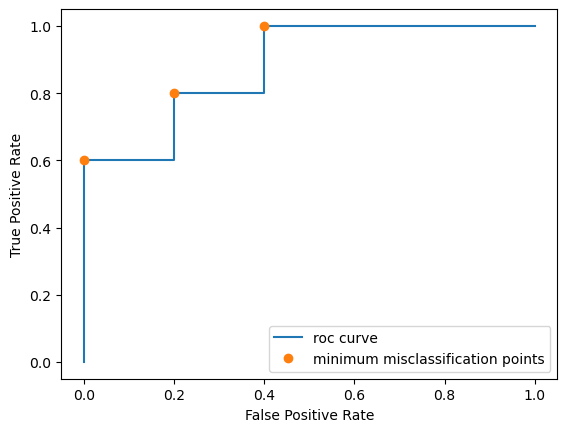

In [342]:
def roc_points(conf_mat):
    tpr = conf_mat[0,0]/(conf_mat[0, 0] + conf_mat[1, 0])
    fpr = conf_mat[0,1]/(conf_mat[0, 1] + conf_mat[1, 1])
    return np.array([[fpr, tpr]])

def get_roc_points(mat, func):
    output_arr = np.array([])
    for obs in mat:
        output = [func(obs[:-1])]
        output_arr = np.append(output_arr, output)
    y = mat[:, -1]
    ys = np.vstack([output_arr, y]).T # combine output array and y array
    ys_sort = ys[ys[:, 0].argsort()] # sort by output values
    ys_sort = np.flip(ys_sort, axis=0)
    n = len(ys_sort) # num observations
    roc_mat = np.empty((0,2), int)
    for i in range(len(ys_sort) + 1): # iterrate through all thresholds
        conf_mat = boundry_confusion_matrix(ys_sort, i)
        points = roc_points(conf_mat)
        roc_mat = np.append(roc_mat, points, axis=0)
    roc_df = pd.DataFrame(roc_mat, columns = ['fpr', 'tpr'])
    plt.plot('fpr', 'tpr', data=roc_df, linestyle='-') 
    plt.plot([0,.2,.4], [.6,.8, 1],'o') 
    plt.legend(['roc curve', 'minimum misclassification points'])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

get_roc_points(data_matrix, f)



# 5 Classification with KNN and Decision Trees {-}

### 5.2) {-}

In [353]:
# import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier as dtc


In [354]:
# functions to perform hyperparameter tuning cross validation

def k_fold_cv(data, params, clf, target_col_name, gosdt=False):
    # take whole training data and shuffle rows
    data = data.sample(frac=1)
    # split into 10 folds
    num_rows = data.shape[0]
    fold_size = math.ceil(num_rows/10)
    # loop through 10 folds using 9 as training set
    f1_df = pd.DataFrame()
    for i in range(0, num_rows, fold_size):
        val, train = split_train_val(data, i, fold_size, num_rows)
        val_X, val_y = preprocess_data(val, target_col_name)
        train_X, train_y = preprocess_data(train, target_col_name)

       
        # iterrate through all combinations of hyperperameters
        f1_dict = {} # dictionary of f1 scores for each hyperparam pair
        for param_j in params[list(params.keys())[0]]:
            for param_k in params[list(params.keys())[1]]:
                dp = {list(params.keys())[0]: param_j, list(params.keys())[1]: param_k}
                if gosdt:
                    clf_model = clf(dp)
                else:
                    clf_model = clf(**dp) # create instance of the model with given hyperparameters
                clf_model.fit(train_X, train_y) # fit with training data
                y_pred = clf_model.predict(val_X) # get predicted y vals
                val_y['y_pred'] = y_pred # create dataframe with true y's and y_hats
                conf_mat = confusion_matrix(val_y, target_col_name)
                f1_score = metrics(conf_mat)[0]
                param_comb = 'param_j:' + str(param_j) + ',param_k:' + str(param_k)
                f1_dict[param_comb] = [f1_score]
        f1_df = pd.concat([f1_df, pd.DataFrame(f1_dict)]) # add new row of f1 scores
    f1_df.reset_index(inplace=True, drop=True)
    return f1_df

def split_train_val(data, i, fold_size, num_rows):
    # split training data into train and validation groups
    eval = data.iloc[i:i+fold_size] # evaluation fold
    train1 = data.iloc[0:i] # train set 1
    train2 = data.iloc[i+fold_size: num_rows] # train set 2
    train = pd.concat([train1, train2]) # combine train sets
    return eval, train


def preprocess_data(data, target_name):
    feature_names = data.columns.to_list() # get feature cols
    feature_names.remove(target_name) 

    data_X = data[feature_names] # feature df
    data_y = data[[target_name]] # target df
    data_X = pd.get_dummies(data_X, drop_first=True) # one hot encoding
    data_X = data_X.reset_index(drop=True)
    data_y = data_y.reset_index(drop=True)
    return data_X, data_y


def confusion_matrix(df, target_col_name):
    '''
    create a confusion matrix from the given df of y's and y_hat's
    '''
    tp = df.loc[(df[target_col_name] == 1) & (df['y_pred'] == 1)].shape[0]
    fn = df.loc[(df[target_col_name] == 1) & (df['y_pred'] == 0)].shape[0]
    fp = df.loc[(df[target_col_name] == 0) & (df['y_pred'] == 1)].shape[0]
    tn = df.loc[(df[target_col_name] == 0) & (df['y_pred'] == 0)].shape[0]
    conf_mat = np.array([[tp, fn], [fp, tn]]) # confusion matrix
    return conf_mat

SKlearn decision tree classifier

In [355]:
train_file = "carseats_train.csv" # training data file
df = pd.read_csv(train_file)
target_col_name = 'Sales'
params_dict = {'criterion':["gini", "entropy"], 'max_depth':[2,3]}
cv_scores = k_fold_cv(df, params_dict, dtc, target_col_name)


In [356]:
print('Average F1 scores for each of the hyperparameter pairs')
print('Note: param_j is criterion and param_k is max_depth')
cv_mean = cv_scores.mean()
print(cv_mean)
# param_j is criterion and param_k is max_depth

Average F1 scores for each of the hyperparameter pairs
Note: param_j is criterion and param_k is max_depth
param_j:gini,param_k:2       0.458497
param_j:gini,param_k:3       0.498864
param_j:entropy,param_k:2    0.425164
param_j:entropy,param_k:3    0.511288
dtype: float64


For sklearn decision trees the best performing hyperparameter combination was criteria:entropy and max_depth:3

GOSDT Classifier

In [357]:
%%capture
train_file = "carseats_train.csv" # training data file
df = pd.read_csv(train_file)
target_col_name = 'Sales'
config = {
        "regularization": [.05,0.001],
        "depth_budget": [2, 3]
    }
cv_scores = k_fold_cv(df, config, GOSDT, target_col_name, gosdt = True)



In [358]:
print('Average F1 scores for each of the hyperparameter pairs')
print('Note: param_j is regularization and param_k is depth_budget')
cv_mean = cv_scores.mean()
print(cv_mean)
# param_j is regularization and param_k is depth_budget

Average F1 scores for each of the hyperparameter pairs
Note: param_j is regularization and param_k is depth_budget
param_j:0.05,param_k:2     0.390638
param_j:0.05,param_k:3     0.390638
param_j:0.001,param_k:2    0.390638
param_j:0.001,param_k:3    0.556850
dtype: float64


For GOSDT the best performing hyperparameter combination was regularization:0.001 and depth_budget:3

### 5.3) {-}

In [359]:
### knn class

class KNN:
    def __init__(self, dist_metric, k):
        if dist_metric == "euclidean":
            self.dist_metric = self.euclidean_distance
        elif dist_metric == 'manhattan':
            self.dist_metric = self.manhattan_distance
        self.k = k
        pass

    def fit(self, X, y):
        self.train_data_X = X 
        self.train_data_y = y

    
    def predict(self, test_data_X):
        '''
        predict the y labels for the dataframe test_data_X 
        '''
        # list of y_hats
        y_hat_list = []
        # iterrate through each test row
        for test_i, test_row in test_data_X.iterrows():
            self.closest_points_dist = [] # list of the k smallest distances for a given test_row
            self.closest_points_ys = [] # list of corresponding y's associated with the train row with the smallest distances
            for train_i, train_row in self.train_data_X.iterrows():
                # get distance
                new_dist = self.dist_metric(test_row.values.flatten().tolist(), train_row.values.flatten().tolist())
                # check largest dist and if new dist is less then replace it and its corresponding y
                self.check_largest_dist(new_dist, train_i)
            y_mean = sum(self.closest_points_ys)/len(self.closest_points_ys)
            # determine the label for y_hat
            if y_mean >= .5:
                y_hat_list.append(1)
            else:
                y_hat_list.append(0)
        return y_hat_list
    
    
    def check_largest_dist(self, new_dist, train_index):
        '''
        check to see if the distance between the current training point and the test point
        is smaller than the largest distance in the list of k smallest distances
        '''
        if len(self.closest_points_dist) > 0:
            max_in_list = max(self.closest_points_dist) # get largest value in list
        # if list doesnt have k elements already just add new distance and train_y to respective lists
        if len(self.closest_points_dist) < self.k: 
            self.closest_points_dist.append(new_dist)
            self.closest_points_ys.append(self.train_data_y.iloc[train_index].values[0])
        # else check if the newest distance is less than the largest distance in the list of k elements
        # if it is switch them out and switch out their respective y's
        elif new_dist < max_in_list:
            index_of_max = self.closest_points_dist.index(max_in_list)
            self.closest_points_dist.pop(index_of_max) # drop the old largest distance from list
            self.closest_points_dist.append(new_dist) # add the new distance to the list
            self.closest_points_ys.pop(index_of_max) # drop the y value corresponding to the point that was just dropped
            self.closest_points_ys.append(self.train_data_y.iloc[train_index].values[0]) # add the y of the new distance
        

    def euclidean_distance(self, test_row, train_row): 
        # train and test are lists
        dist = 0
        for i in range(len(train_row)):
            dist = dist + (train_row[i] - test_row[i])**2
        dist = (dist)**(1/2)
        return dist


    def manhattan_distance(self, test_row, train_row): 
        # train and test are lists
        dist = 0
        for i in range(len(train_row)):
            dist = dist + abs(train_row[i] - test_row[i])
        return dist

In [360]:
train_file = "carseats_train.csv" # training data file
df = pd.read_csv(train_file)
target_col_name = 'Sales'
params_dict = {'dist_metric':["euclidean", "manhattan"], 'k':[1,3]}
cv_scores = k_fold_cv(df, params_dict, KNN, target_col_name)

In [361]:
print('Average F1 scores for each of the hyperparameter pairs')
print('Note: param_j is distance_metric and param_k is k')
cv_mean = cv_scores.mean()
print(cv_mean)
# param_j is distance metric and parak_k is k

Average F1 scores for each of the hyperparameter pairs
Note: param_j is distance_metric and param_k is k
param_j:euclidean,param_k:1    0.420649
param_j:euclidean,param_k:3    0.318225
param_j:manhattan,param_k:1    0.464892
param_j:manhattan,param_k:3    0.359026
dtype: float64


For KNN the best performing hyperparameter combination was dist_metric:manhattan and k:1

### 5.4) {-}

In [363]:
''' 
Fit the three algorithms with tuned hyperparameters on the full trainng data 
Then Get the F1 score using the test data
'''


def test_model(model, train_X, train_y, test_X, test_y):
    model.fit(train_X, train_y) # fit with training data
    y_pred = model.predict(test_X) # get predicted y vals
    test_y['y_pred'] = y_pred # create dataframe with true y's and y_hats
    conf_mat = confusion_matrix(test_y, target_col_name)
    f1_score = metrics(conf_mat)[0]
    return f1_score


train_file = "carseats_train.csv" # training data file
train_df = pd.read_csv(train_file)
test_file = "carseats_test.csv" # testing data file
test_df = pd.read_csv(test_file)
target_col_name = 'Sales'
train_X, train_y = preprocess_data(train_df, target_col_name)
test_X, test_y = preprocess_data(test_df, target_col_name)



# configure gosdt classifier
params = {'regularization':0.001, 'depth_budget':3}
gosdt_model = GOSDT(params)
f1 = test_model(gosdt_model, train_X, train_y, test_X, test_y)
print("gosdt_model f1 score:", f1)

# configure sklearn decision tree classifier
params = {'criterion':"entropy", 'max_depth':3}
sktree_model = dtc(**params)
f1 = test_model(sktree_model, train_X, train_y, test_X, test_y)
print("sktree_model f1 score:", f1)

# configure knn classifier
params = {'dist_metric':"manhattan", 'k':1}
knn_model = KNN(**params)
f1 = test_model(knn_model, train_X, train_y, test_X, test_y)
print("knn_model f1 score:", f1)








gosdt reported successful execution
training completed. 0.502/0.007/0.515 (user, system, wall), mem=243524 MB
bounds: [0.220312..0.220312] (0.000000) loss=0.216312, iterations=1115
gosdt_model f1 score: 0.4576271186440678
sktree_model f1 score: 0.7288135593220338
knn_model f1 score: 0.5254237288135594


based on the f1 score, the SKLearn Decision Tree Classifier CART model with parameters Criterion = entropy and max_depth = 3 performed the best